# Building an image classifier using the sequential API

Following step-by-step procedure in Chapter 10 of Aurélien Géron's book _Hands-on Machine Learning with Scikit-Learn, Keras and TensorFlow_.

In [1]:
from pathlib import Path, PurePath
import pandas as pd
from time import time
import matplotlib.pyplot as plt
%matplotlib inline

In [2]:
import tensorflow
print(f'TensorFlow version: {tensorflow.__version__}')
from tensorflow import keras
print(f'Keras version: {keras.__version__}')

TensorFlow version: 2.1.0
Keras version: 2.2.4-tf


We will be using the _Fashion MNIST data set_, which has fashion image items instead of numbers.

In [4]:
fashion_mnist = keras.datasets.fashion_mnist
(X_train_full, y_train_full), (X_test, y_test) = fashion_mnist.load_data()

In [5]:
print(f'X_train_full.shape: {X_train_full.shape}')
print(f'X_train_full.dtype: {X_train_full.dtype}')

X_train_full.shape: (60000, 28, 28)
X_train_full.dtype: uint8


In [6]:
X_valid, X_train = X_train_full[:5000] / 255.0, X_train_full[5000:] / 255.0
y_valid, y_train = y_train_full[:5000], y_train_full[5000:]

In [7]:
class_names = ["T-shirt/top", "Trouser", "Pullover", "Dress", "Coat", "Sandal", "Shirt", "Sneaker", "Bag", "Ankle boot"]

## Build model with sequential API

In [8]:
model = keras.models.Sequential([keras.layers.Flatten(input_shape=[28, 28]), \
                                 keras.layers.Dense(300, activation="relu"), \
                                 keras.layers.Dense(100, activation="relu"), \
                                 keras.layers.Dense(10, activation="softmax")])

In [9]:
model.summary()

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
flatten (Flatten)            (None, 784)               0         
_________________________________________________________________
dense (Dense)                (None, 300)               235500    
_________________________________________________________________
dense_1 (Dense)              (None, 100)               30100     
_________________________________________________________________
dense_2 (Dense)              (None, 10)                1010      
Total params: 266,610
Trainable params: 266,610
Non-trainable params: 0
_________________________________________________________________


In [10]:
model.layers

In [11]:
hidden1 = model.layers[1]
hidden1.name

'dense'

In [12]:
model.get_layer('dense_2') is hidden1

False

In [13]:
weights, biases = hidden1.get_weights()

### Compiling the model

In [14]:
model.compile(loss="sparse_categorical_crossentropy", optimizer="sgd", metrics=["accuracy"])

In [15]:
t0 = time()
history = model.fit(X_train, y_train, epochs=30, validation_data=(X_valid, y_valid))
print(f'Time elapsed: {time() - t0:.4f} sec')

Train on 55000 samples, validate on 5000 samples
Epoch 1/30
55000/55000 [==============================] - 3s 60us/sample - loss: 0.7245 - accuracy: 0.7591 - val_loss: 0.5168 - val_accuracy: 0.8264
Epoch 2/30
55000/55000 [==============================] - 3s 54us/sample - loss: 0.4900 - accuracy: 0.8292 - val_loss: 0.4484 - val_accuracy: 0.8454
Epoch 3/30
55000/55000 [==============================] - 3s 54us/sample - loss: 0.4459 - accuracy: 0.8439 - val_loss: 0.4380 - val_accuracy: 0.8492
Epoch 4/30
55000/55000 [==============================] - 3s 54us/sample - loss: 0.4201 - accuracy: 0.8523 - val_loss: 0.4108 - val_accuracy: 0.8566
Epoch 5/30
55000/55000 [==============================] - 3s 54us/sample - loss: 0.3999 - accuracy: 0.8590 - val_loss: 0.4274 - val_accuracy: 0.8556
Epoch 6/30
55000/55000 [==============================] - 3s 54us/sample - loss: 0.3841 - accuracy: 0.8641 - val_loss: 0.3782 - val_accuracy: 0.8696
Epoch 7/30
55000/55000 [==============================] -

In [16]:
history.params

{'batch_size': 32,
 'epochs': 30,
 'steps': 1719,
 'samples': 55000,
 'verbose': 0,
 'do_validation': True,
 'metrics': ['loss', 'accuracy', 'val_loss', 'val_accuracy']}

In [17]:
df = pd.DataFrame(history.history)
df.tail(10)

,loss,accuracy,val_loss,val_accuracy
20,0.266131,0.904164,0.323955,0.8834
21,0.261236,0.905309,0.337468,0.8792
22,0.256647,0.907582,0.305201,0.8898
23,0.251535,0.908764,0.304710,0.8900
24,0.246526,0.910764,0.298592,0.8912
25,0.243460,0.912491,0.308627,0.8860
26,0.239277,0.912909,0.290976,0.8952
27,0.236191,0.915727,0.305651,0.8902
28,0.231085,0.916145,0.308737,0.8930
29,0.227509,0.917873,0.298480,0.8886


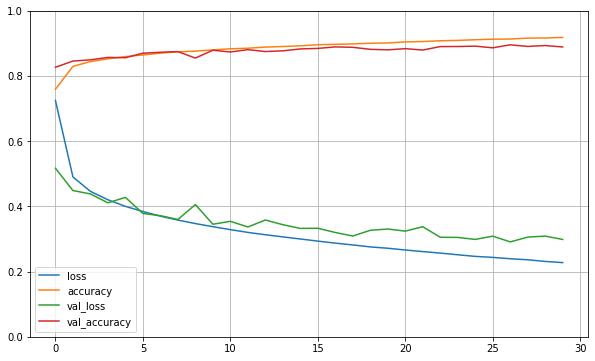

In [18]:
df.plot(figsize=(10, 6))
plt.grid(True)
plt.gca().set_ylim(0, 1);